# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [ ]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`

In [ ]:
# 1.3.1.2
# implement Linear Regression


class LinearRegression:

    def __init__(self, alpha = 0.019, n_iters=7700):
        self.alpha = alpha
        self.n_iters = n_iters
        self.theta = None
        self.error = None
        
    def predict(self, X):
        y_pred = np.dot(X,self.theta) + self.error
        return y_pred
    
    def fit(self, X, y):
        shape = X.shape
        total_size=shape[0]
        self.theta = np.zeros(shape[1])
        self.error = 0
        
        for _ in range(self.n_iters):
            y_pred = np.dot(X,self.theta) + self.error
            self.error,self.theta=self.gradient_descent(y,y_pred,X,total_size)
            
    def gradient_descent(self,y,y_pred,X,total_size):
            return self.error - self.alpha * ((2/total_size) * (y_pred-y).sum()),self.theta - self.alpha * ((2/total_size) * np.dot(X.T, (y_pred-y)))
    def score(self,y_true,y_pred):
        return ((y_true-y_pred)**2).sum()/len(y_true)
            
    

In [ ]:
# 1.3.2.3
# try with different learning rates and choose the best one
rand=np.linspace(0.01, 0.02, num=333)
min=float("inf")
y_pred_f=y_test
min_lr=1
for i in rand:
    regressor=LinearRegression(alpha=i)
    regressor.fit(np.array(x_train),np.array(y_train))
    y_pred=regressor.predict(x_test)
    score=regressor.score(y_test,y_pred)
    if score < min :
        y_pred_f=y_pred
        min=score
        min_lr=i
    

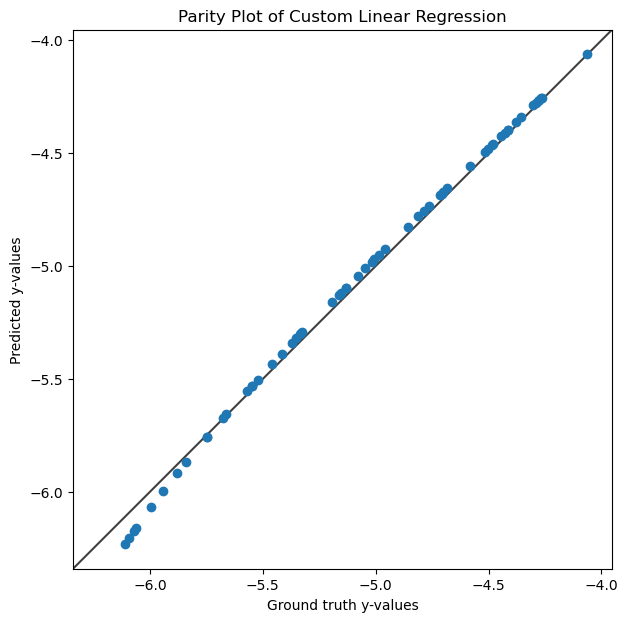

0.001553829128337613


In [ ]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y_test, y_pred_f)


lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()
print(min)

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`

In [ ]:
# 1.3.2.2
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import pandas as pd
rand=np.linspace(0.01, 1.01, num=100)
zero=np.zeros(shape=(100,2))
index=0
y_pre_f=y_test
min_lr=1
min=float("inf")
for i in rand:
    clf = Ridge(alpha=i)
    clf.fit(x_train, y_train)
    y_pre=clf.predict(x_test)
    zero[index][1]=mean_squared_error(y_test,y_pre,squared=False)
    zero[index][0]=i
    if zero[index][1] < min :
        min=zero[index][1]
        min_lr=i
        y_pre_f=y_pre
    index=index+1

pd.DataFrame(zero,columns=["alpha","RMSE"]).transpose()
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
alpha,0.010000,0.020101,0.030202,0.040303,0.050404,0.060505,0.070606,0.080707,0.090808,0.100909,...,0.919091,0.929192,0.939293,0.949394,0.959495,0.969596,0.979697,0.989798,0.999899,1.010000
RMSE,0.307387,0.282483,0.246501,0.214341,0.187362,0.165045,0.146632,0.131433,0.118874,0.108493,...,0.068754,0.069014,0.069275,0.069537,0.069801,0.070066,0.070332,0.070600,0.070869,0.071139


<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`

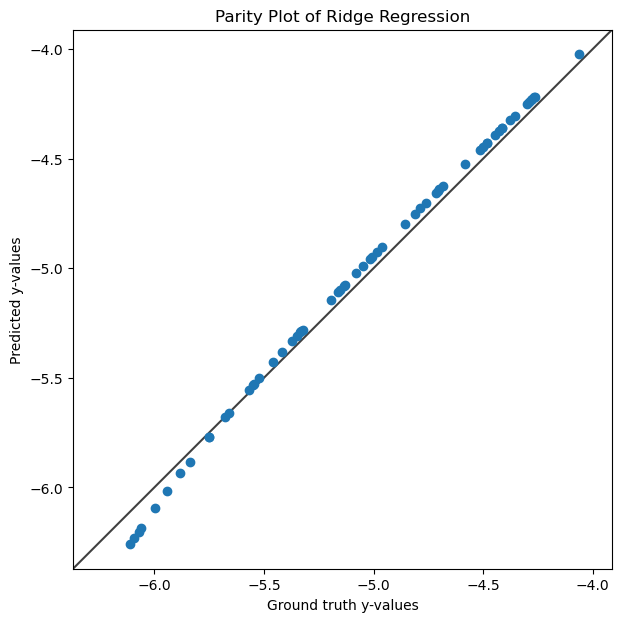

In [ ]:
# 1.3.2.4

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pre_f)


lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Ridge Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`

In [ ]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
rand=np.linspace(0.001, 0.01, num=1000)
zero=np.zeros(shape=(1000,2))
index=0
y_pre_l=y_test
min_lr=1
min=float("inf")
for i in rand:
    clf = Lasso(alpha=i)
    clf.fit(x_train, y_train)
    y_pre_ll=clf.predict(x_test)
    zero[index][1]=mean_squared_error(y_test,y_pre_ll,squared=False)
    zero[index][0]=i
    if zero[index][1] < min :
        min=zero[index][1]
        min_lr=i
        y_pre_l=y_pre_ll
    index=index+1

pd.DataFrame(zero,columns=["alpha","RMSE"]).transpose()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
alpha,0.001000,0.001009,0.001018,0.001027,0.001036,0.001045,0.001054,0.001063,0.001072,0.001081,...,0.009919,0.009928,0.009937,0.009946,0.009955,0.009964,0.009973,0.009982,0.009991,0.01000
RMSE,0.179667,0.179450,0.179214,0.178993,0.178747,0.178514,0.178294,0.178088,0.177850,0.177623,...,0.040985,0.041141,0.041298,0.041453,0.041613,0.041773,0.041931,0.042095,0.042259,0.04242


<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`

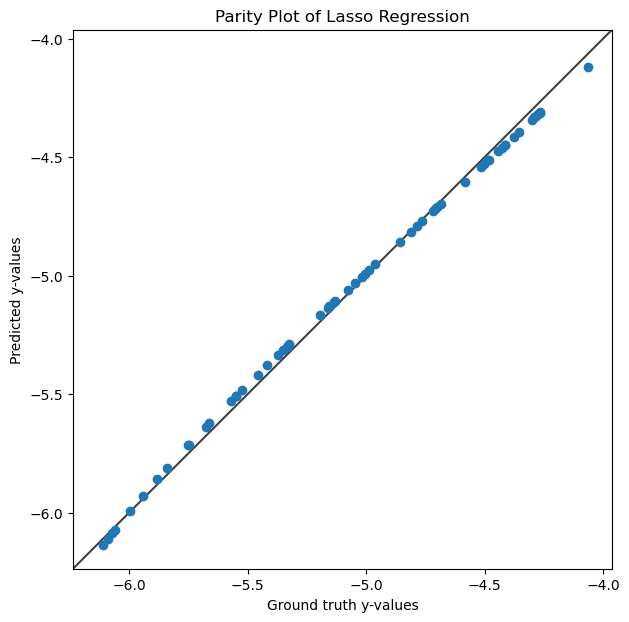

0.00873873873873874


In [ ]:
# 1.3.3.4
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pre_l)


lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Lasso Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()
print(min_lr)